In [2]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '0cb7a710-8666-42a4-acbd-a3cfba601d29'
resource_group = 'Grup2'
workspace_name = 'Grup2AML'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='steam')
df = dataset.to_pandas_dataframe()
df.head()

,name,developer,publisher,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,price
0,Counter-Strike,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,7.19
1,Team Fortress Classic,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,3.99
2,Day of Defeat,Valve,Valve,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,3.99
3,Deathmatch Classic,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,3.99
4,Half-Life: Opposing Force,Gearbox Software,Valve,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,3.99


In [95]:
df.isnull().values.any()
df.dtypes
#df = df.reindex(columns = df.columns.tolist() + ['like_rate'])
#names = df['name'].values

name                 object
developer            object
publisher            object
categories           object
genres               object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
price               float64
dtype: object

In [18]:
df.describe()

,achievements,positive_ratings,negative_ratings,average_playtime,price
count,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.000000
mean,45.248864,1.000559e+03,211.027147,149.804949,6.078193
std,352.670281,1.898872e+04,4284.938531,1827.038141,7.874922
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,6.000000e+00,2.000000,0.000000,1.690000
50%,7.000000,2.400000e+01,9.000000,0.000000,3.990000
75%,23.000000,1.260000e+02,42.000000,0.000000,7.190000
max,9821.000000,2.644404e+06,487076.000000,190625.000000,421.990000


In [20]:
df.query('positive_ratings == negative_ratings')

,name,developer,publisher,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,price
262,PT Boats: Knights of the Sea,Studio4,Akella,Single-player;Multi-player,Simulation,0,12,12,0,4.99
369,Planet Busters,Slam,Slam,Single-player;Steam Achievements;Partial Contr...,Indie;Casual,9,1,1,0,5.99
786,Tommy Tronic,Oasis Games,Interplay Inc.,Single-player,Action;Adventure;Indie,0,7,7,0,6.99
1426,Damage Inc. Pacific Squadron WWII,Trickstar Games,Mad Catz,Single-player;Multi-player;Co-op;Steam Achieve...,Action;Simulation,36,6,6,0,29.99
2152,3079 -- Block Action RPG,Phr00t's Software,Phr00t's Software,Single-player;Multi-player;Co-op;Cross-Platfor...,Action;Indie;RPG,0,231,231,204,3.99
2425,A Mass of Dead,Dev Arc,Dev Arc,Single-player;Multi-player;Co-op;Cross-Platfor...,Action;Indie,22,20,20,0,3.99
2709,Paper Dungeons,Stephane Valverde;Leslie Valverde,Agent Mega,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie;RPG,25,38,38,372,6.99
3228,Pure Pool,VooFoo Studios,Ripstone,Single-player;Multi-player;Steam Achievements;...,Casual;Simulation;Sports,51,129,129,0,7.99
3376,Infinite Scuba®,Cascade Game Foundry SPC,Cascade Game Foundry SPC,Single-player,Casual;Indie;Simulation;Early Access,0,7,7,0,9.99
3402,Frontline : Road to Moscow,88mm,Slitherine Ltd.,Single-player,Strategy,0,27,27,0,6.99


In [17]:
import numpy as np
from scipy import stats
positive_ratings = df['achievements'].values
print(stats.describe(positive_ratings))

DescribeResult(nobs=27075, minmax=(0, 9821), mean=45.24886426592798, variance=124376.32707219383, skewness=13.43027723387, kurtosis=191.15564196642086)


In [58]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestRegressor 

# Isolate Data, class labels and column values
X = df.iloc[:, [6,7,8]]
Y = df.iloc[:,-1]
names = df.columns.values
# Build the model
rfc = RandomForestRegressor()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))
#This explains that the game name and publishers are important features according to playtime and comments

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.4652, 'name'), (0.3438, 'developer'), (0.191, 'publisher')]


[[-207999.9633729   363361.38664006]
 [2387235.3502987   -60063.20512811]
 [-739773.58996331  -82998.16289229]
 [-739508.90996703  -85061.09644949]
 [-699952.88699546 -135238.92217018]]


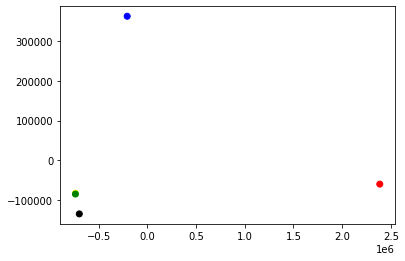

In [77]:
# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=2)

# Reduce the data, output is ndarray
reduced_data = pca.fit_transform([df["negative_ratings"], df["positive_ratings"], df["price"],df["achievements"],df["average_playtime"]])

# Inspect shape of the `reduced_data`
reduced_data.shape

# print out the reduced data
print(reduced_data)

import matplotlib.pyplot as plt

plt.scatter(reduced_data[:,0], reduced_data[:,1],c = ["blue", "red", "yellow", "green", "black"], cmap = 'viridis')

plt.show()

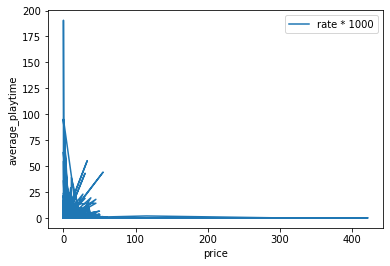

In [102]:
import matplotlib.pyplot as plt

x1 = df["price"].values
y1 = df["average_playtime"].values / 1000

plt.plot(x1, y1, label = "rate * 1000")
# line 2 points
#x2 = df["price"].values
#y2 = df["positive_ratings"].values

#plt.plot(x2, y2, label = "negative")
plt.xlabel('price')
plt.ylabel('average_playtime')
plt.legend()
plt.show()
#free games have more average playtime

In [104]:
df.rank()
df.corr()
#positive and negative ratings are the most related columns, comments makes a game popular
#avg playtime is effected by pos & neg comments

,achievements,positive_ratings,negative_ratings,average_playtime,price
achievements,1.000000,0.006058,0.003578,0.014175,-0.007996
positive_ratings,0.006058,1.000000,0.762804,0.157898,0.036110
negative_ratings,0.003578,0.762804,1.000000,0.161140,0.051259
average_playtime,0.014175,0.157898,0.161140,1.000000,0.049242
price,-0.007996,0.036110,0.051259,0.049242,1.000000


There is 2 strongly correlated values with positive_ratings:
positive_ratings    1.000000
negative_ratings    0.762804
Name: positive_ratings, dtype: float64


There is 0 strongly correlated values with price:
Series([], Name: price, dtype: float64)


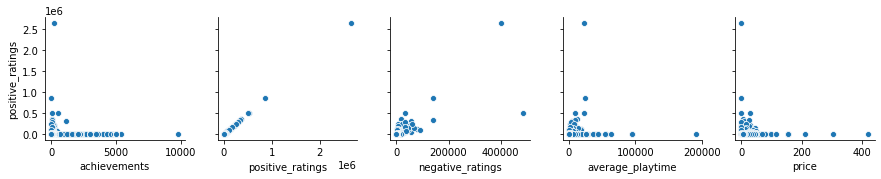

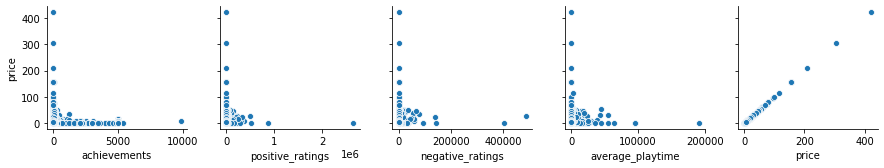

In [145]:
df_num_corr = df_num.corr()['positive_ratings'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with positive_ratings:\n{}".format(len(golden_features_list), golden_features_list))

for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['positive_ratings'])
    
df_num_corr = df_num.corr()['price'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("\n\nThere is {} strongly correlated values with price:\n{}".format(len(golden_features_list), golden_features_list))

for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price'])

In [105]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 10 columns):
name                27075 non-null object
developer           27075 non-null object
publisher           27075 non-null object
categories          27075 non-null object
genres              27075 non-null object
achievements        27075 non-null int64
positive_ratings    27075 non-null int64
negative_ratings    27075 non-null int64
average_playtime    27075 non-null int64
price               27075 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


count    27075.000000
mean         6.078193
std          7.874922
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        421.990000
Name: price, dtype: float64


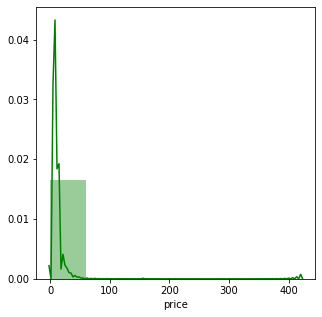

In [124]:
import seaborn as sns
print(df['price'].describe())
plt.figure(figsize=(5, 5))
sns.distplot(df['price'], color='g', bins=7, hist_kws={'alpha': 0.4});
#the prices are skewed right and some outliers lies above ~50. 

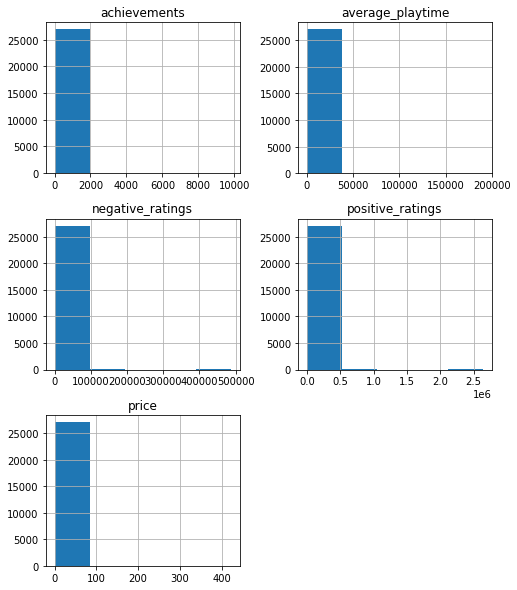

In [135]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(8, 10), bins=5, xlabelsize=10, ylabelsize=10);

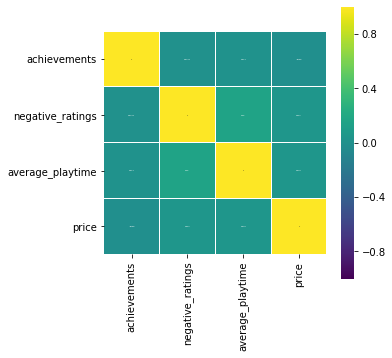

In [153]:
corr = df_num.drop('positive_ratings', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(5, 5))

sns.heatmap(corr[(corr >= 0.5) | (corr <= 1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 2}, square=True);